In [4]:
#This block of text is for all of the necessary modules and packages
#install modules
!pip install lyricsgenius;
!pip install textblob;
!python -m textblob.download_corpora;

#import packages
import lyricsgenius
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from gensim.summarization import keywords #contains functions to find keywords of the text 
import spacy # library for advanced Natural Language Processing | supports tokenization
import nltk #natural language toolkit that
from nltk.corpus import stopwords #defines the common words that are not necessary to understand the sentiment
nltk.download('stopwords')
stopwords = set(stopwords.words('english')) #variable for the stop words
from spacy.lang.en import English
nlp = English() #creates the npl object
nlp.max_length = 10000000 #ensures the document size isn't too large
import pandas as pd
from textblob import TextBlob #API for speech tagging 

     |████████████████████████████████| 61kB 2.8MB/s 
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#This block reads in the csv for the songs and creates a new table with just the song and artist for the years we want
#import billboard hot100 dataset
hot100_df = pd.read_csv('https://query.data.world/s/qf6et5c7dh23kglnvjcoztlmom62it')
hot100_df.drop_duplicates(subset='SongID', inplace = True) #remove duplicate occurrences of songs
hot100_df.reset_index()

#Turns the csv into a table
#Use get_lyrics funcion to get lyrics for every song in dataset
lyrics = hot100_df.apply(lambda row: get_lyrics(row['Song'], row['Performer']), axis =1)
hot100_df['Lyrics'] = lyrics
hot100_df = hot100_df.drop(hot100_df[hot100_df['Lyrics'] == 'not found'].index) #drop rows where lyrics are not found on Genius

#Use get_lyric_sentiment to get sentiment score for all the song lyrics
sentiment = hot100_df.apply(lambda row: get_lyric_sentiment(row['Lyrics']), axis =1)
hot100_df['Sentiment'] = sentiment

#Resample daraframe lyrics by year. Get all the lyrics for every song for each year
lyrics_resample = hot100_df['Lyrics'].resample('Y').sum()

#Use return_keywords function on lyrics_resample to get the top 20 keywords for each year
lyric_keywords = [return_keywords(x[1]) for x in lyrics_resample.iteritems()]

hold_df = hot100_df.iloc[:, [1, 3, 4]]
#clean_df = hold_df[hold_df.WeekID == '12/26/1981']
#[m,n] = hold_df.size
#print(m)
#clean_df = []

# size = hold_df.size
# for x in range(size):
#   hold_df.iloc[x, 0] = int(hold_df.iloc[x, 0][-4:])
#   if hold_df.iloc[x, 0] < 1990:
#     clean_df = hold_df.drop[]]


# print(clean_df)

#int(hold_df.iloc[1000, 0][-4:])
#print(clean_df)




NameError: ignored

In [5]:
!pip install lyricsgenius

#Information for the lyric genius API to connect genius to our program
Client_ID = 'UEVchXffSPkpCiLB9CIGt3__ZwqaGnbAzq4Cs80mlV3b0OOE_Z3Oa-xY7FKtsz-U' 
client_password = '3Hp3B2y3cOlL950cATehneaMpsqZMVhuMUpzHio57PJUF4cgn8LkyrzTBBRVFFd6el4ADdBnPujcrjuTzla3CA' 
Access_token = 'P0sZsd5S0iyJ8xpNTn56Qk4kN94fJLVNrXqza8vC9l7AlQ9vFEhmVvR3mzwkrU5c'



#Genius stuff
genius = lyricsgenius.Genius(Access_token)
#artist = genius.search_artist("Rihanna", max_songs=1, sort="title")
#print(artist.songs)



#getting lyrics from genius
def get_lyrics(title, artist):
  try:
    return genius.search_song(title, artist).lyrics
  except:
    return 'not found'

#pre-processing text
def preprocess(text):
    # Create Doc object
    doc = nlp(text, disable=['ner', 'parser'])
    # Generate lemmas
    lemmas = [token.lemma_ for token in doc]
    # Remove stopwords and non-alphabetic characters
    a_lemmas = [lemma for lemma in lemmas 
            if lemma.isalpha() and lemma not in stopwords]
    
    return ' '.join(a_lemmas)

#preprocess(text)
print()

def return_keywords(texts):
    xkeywords = []
    values = keywords(text=preprocess(texts),split='\n',scores=True)
    for x in values[:10]:
        xkeywords.append(x[0])
    try:
        return xkeywords 
    except:
        return "no content"

#return_keywords(text)
def get_lyric_sentiment(lyrics): 
	analysis = TextBlob(lyrics) 
	return analysis.sentiment.polarity

all_keywords = []

# for x in range(1):
#   title = hold_df.iloc[x, 1]
#   artist = hold_df.iloc[x, 2]
#   text = get_lyrics(title, artist)
#   preprocess(text)
#   #print(return_keywords(text))
#   all_keywords += return_keywords(text)
#   get_lyric_sentiment(text)

# print(all_keywords)
# print(get_lyric_sentiment(text))



Enter your birth month (corresponding number, ex. 3 for March): 2
Enter your birth day: 20
It looks like youre a Pisces! Lets see what traits this sign typically posesses:
Imaginative, Sensitive, Compassionate, Kind, Selfless, Unworldly, Intuitive, Sympathetic, Escapist, Idealistic, Secretive, Vague, Impressionable, Fickle

Here are 5 artists that share your sign!
Rihanna, Carrie Underwood, Bon Jovi, Kesha, Bad Bunny

Please pick an artist from this list to get more information on them (Write their name as seen on the list): Kesha
Youve chosen Kesha - Their birthday is on March 1, 1987, making them the same sign as you! A popular song of theirs is 'Die Young.'

Do you want to see the lyrics? Type yes or no: yes

Searching for "Die Young" by Kesha...
Done.

Here are the lyrics to that song:
[Chorus]
I hear your heart beat to the beat of the drums
Oh, what a shame that you came here with someone
So while you're here in my arms
Let's make the most of the night, like we're gonna die young


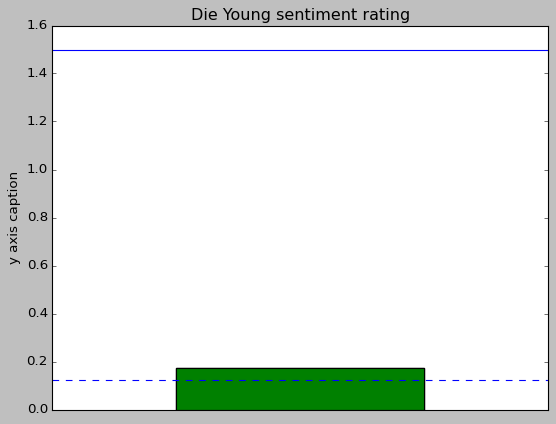

The sentiment rating is on a scale from -1 to 1, where 1 has the most positive word
The average the top 100 songs of the past 60 years is 0.125


TypeError: ignored

In [10]:
#Compliation of previous functions into this block
#Written by Naomi, took her ~4.5 hours

#Birthday sorting information and function to tell sign
#Written by Naomi, took her ~30 minutes

#Finding out the user's sign :)
#function written by chloe, took her ~1 hour

month_str = input("Enter your birth month (corresponding number, ex. 3 for March): ")
month_per = int(month_str) #Takes month string from the user and turns it into a number

day_str = input("Enter your birth day: ")
day_per = int(day_str) #Takes day string from the user and turns it into a number


#If user inputs invalid dates like February 35th or 13 for a month 
if (day_per > 30) and (month_per == 4 or month_per == 6 or month_per == 9 or month_per == 11):
  sign = 'not a valid date'
elif (day_per > 31) and (month_per == 1 or month_per == 3 or month_per == 5 or month_per == 7 or month_per == 8 or month_per == 10 or month_per == 12):
  sign = 'not a valid date'
elif (day_per > 29 and month_per == 2):
  sign = 'not a valid date'
elif ((month_per == 3) and (day_per >= 21)) or ((month_per == 4) and (day_per <= 19)):
  sign = 'Aries'
 
elif ((month_per == 4) and (day_per >= 20)) or ((month_per == 5) and (day_per <= 20)):
  sign = 'Taurus'

elif ((month_per == 5) and (day_per >= 21)) or ((month_per == 6) and (day_per <= 20)):
  sign = 'Gemini'
  
elif ((month_per == 6) and (day_per >= 21)) or ((month_per == 7) and (day_per <= 22)):
  sign = 'Cancer'
  
elif ((month_per == 7) and (day_per >= 23)) or ((month_per == 8) and (day_per <= 22)):
  sign = 'Leo'
  
elif ((month_per == 8) and (day_per >= 23)) or ((month_per == 9) and (day_per <= 22)):
  sign = 'Virgo'
  
elif ((month_per == 9) and (day_per >= 23)) or ((month_per == 10) and (day_per <= 22)):
  sign = 'Libra'
  
elif ((month_per == 10) and (day_per >= 23)) or ((month_per == 11) and (day_per <= 21)):
  sign = 'Scorpio'
  
elif ((month_per == 11) and (day_per >= 22)) or ((month_per == 12) and (day_per <= 21)):
  sign = 'Sagittarius'
  
elif ((month_per == 12) and (day_per >= 22)) or ((month_per == 1) and (day_per <= 19)):
  sign = 'Capricorn'
  
elif ((month_per == 1) and (day_per >= 20)) or ((month_per == 2) and (day_per <= 18)):
  sign = 'Aquarius'
  
elif ((month_per == 2) and (day_per >= 19)) or ((month_per == 3) and (day_per <= 20)):
  sign = 'Pisces'
    
else:
  sign = 'not a valid date'


if sign == 'not a valid date':
  print()
 

while sign == 'not a valid date':
  month_str = input("I'm sorry, it doesn't look like date you entered was valid. Let's try again! Please enter the month's value again: ")
  month_per = int(month_str) #Takes month string from the user and turns it into a number
  day_str = input("Enter your day of birth again: ")
  day_per = int(day_str) #Takes day string from the user and turns it into a number

  if ((month_per == 3) and (day_per >= 21)) or ((month_per == 4) and (day_per <= 19)):
    sign = 'Aries'
 
  elif ((month_per == 4) and (day_per >= 20)) or ((month_per == 5) and (day_per <= 20)):
    sign = 'Taurus'

  elif ((month_per == 5) and (day_per >= 21)) or ((month_per == 6) and (day_per <= 20)):
    sign = 'Gemini'
  
  elif ((month_per == 6) and (day_per >= 21)) or ((month_per == 7) and (day_per <= 22)):
   sign = 'Cancer'
  
  elif ((month_per == 7) and (day_per >= 23)) or ((month_per == 8) and (day_per <= 22)):
    sign = 'Leo'
  
  elif ((month_per == 8) and (day_per >= 23)) or ((month_per == 9) and (day_per <= 22)):
    sign = 'Virgo'
  
  elif ((month_per == 9) and (day_per >= 23)) or ((month_per == 10) and (day_per <= 22)):
    sign = 'Libra'
  
  elif ((month_per == 10) and (day_per >= 23)) or ((month_per == 11) and (day_per <= 21)):
    sign = 'Scorpio'
  
  elif ((month_per == 11) and (day_per >= 22)) or ((month_per == 12) and (day_per <= 21)):
    sign = 'Sagittarius'
  
  elif ((month_per == 12) and (day_per >= 22)) or ((month_per == 1) and (day_per <= 19)):
    sign = 'Capricorn'
  
  elif ((month_per == 1) and (day_per >= 20)) or ((month_per == 2) and (day_per <= 18)):
    sign = 'Aquarius'
  
  elif ((month_per == 2) and (day_per >= 19)) or ((month_per == 3) and (day_per <= 20)):
    sign = 'Pisces'

  print()

#Different traits the signs possess in the form of lists
#Written by Naomi, took her ~1.5 hours
#Lists of traits

Aries_Traits = ['Adventurous', 'Energetic', 'Pioneering', 'Courageous', 'Enthusiastic',
                'Confident', 'Dynamic', 'Quick-witted', 'Selfish', 'Quick-tempered',
                'Impulsive', 'Impatient', 'Foolhardy', 'Daredevil']

Taurus_Traits = ['Patient', 'Reliable', 'Warm-harted', 'Loving', 'Persistent',
                'Determined', 'Placid', 'Security-loving', 'Jealous', 'Possessive',
                'Resentful', 'Inflexible', 'Self-indulgent', 'Greedy']

Gemini_Traits = ['Adaptable', 'Versatile', 'Communicative', 'Witty', 'Intellectual',
                'Eloquent', 'Youthful', 'Lively', 'Nervous', 'Tense',
                'Superficial', 'Inconsistent', 'Cunning', 'Inquisitive']

Cancer_Traits = ['Emotional', 'Loving', 'Intuitive', 'Imaginative', 'Shrewd',
                'Cautious', 'Protective', 'Sympathetic', 'Changeable', 'Moody',
                'Overemotional', 'Touchy', 'Clingy', 'Insecure']

Leo_Traits = ['Generous', 'Warmhearted', 'Creative', 'Enthusiastic', 'Tolerant',
                'Expansive', 'Faithful', 'Loving', 'Pompous', 'Patronizing',
                'Bossy', 'Interfering', 'Dogmatic', 'Possessive']

Virgo_Traits = ['Modest', 'Shy', 'Meticulous', 'Reliable', 'Practical',
                'Diligent', 'Intelligent', 'Analytical', 'Fussy', 'Overthinker',
                'Overcritical', 'Harsh', 'Perfectionist', 'Conservative']

Libra_Traits = ['Diplomatic', 'Urbane', 'Romantic', 'Charming', 'Easygoing',
                'Sociable', 'Idealistic', 'Peaceable', 'Indecisive', 'Changeable',
                'Gullible', 'Impressionable', 'Flirtatious', 'Self-indulgent']

Scorpio_Traits = ['Determined', 'Forceful', 'Emotional', 'Intuitive', 'Powerful',
                'Passionate', 'Exciting', 'Magnetic', 'Jealous', 'Resentful',
                'Compulsive', 'Obsessive', 'Secretive', 'Obstinate']

Sag_Traits = ['Optimistic', 'Freedom-loving', 'Jovial', 'Good-humored', 'Honest',
                'Straightforward', 'Intellectual', 'Philosophical', 'eeeeeee', 'Careless',
                'Irresponsible', 'Superficial', 'Impatient', 'Restless']

Cap_Traits = ['Practical', 'Prudent', 'Ambitious', 'Disciplined', 'Patient',
                'Careful', 'Humorous', 'Reserved', 'Pessimistic', 'Fatalistic',
                'Miserly', 'Resentful', 'Stoic', 'Rigid']

Aqua_Traits = ['Friendly', 'Humanitarian', 'Honest', 'Loyal', 'Original',
                'Inventive', 'Independent', 'Intellectual', 'Intractable', 'Contrary',
                'Perverse', 'Unpredictable', 'Unemotional', 'Detached']

Pisces_Traits = ['Imaginative', 'Sensitive', 'Compassionate', 'Kind', 'Selfless',
                'Unworldly', 'Intuitive', 'Sympathetic', 'Escapist', 'Idealistic',
                'Secretive', 'Vague', 'Impressionable', 'Fickle']

#Takes the sign that you were just given from the previous code and gives you your traits and artists
#Artists based on birth months
#Took Naomi ~2.5 hour to "research"

if sign == 'Aries':
  print('It looks like youre an Aries! Lets see what traits this sign typically posesses:')
  print(*Aries_Traits, sep = ", ")
  Artists = ['Fergie', 'Elton John', 'Selena', 'Marvin Gaye', 'Lady Gaga']

elif sign == 'Taurus':
  print('It looks like youre a Taurus! Lets see what traits this sign typically posesses:')
  print(*Taurus_Traits, sep = ", ")
  Artists = ['Adele', 'James Brown', 'Stevie Wonder', 'Enrique Iglesias', 'Cher']

elif sign == 'Gemini':
  print('It looks like youre a Gemini! Lets see what traits this sign typically posesses:')
  print(*Gemini_Traits, sep = ", ") 
  Artists = ['Normani', 'Prince', 'Kali Uchis', 'Lionel Richie', 'Lauryn Hill']

elif sign == 'Cancer':
  print('It looks like youre a Cancer! Lets see what traits this sign typically posesses:')
  print(*Cancer_Traits, sep = ", ")
  Artists = ['Ariana Grande', 'Jenni Rivera', 'George Michael', 'Cyndi Lauper', 'Luke Bryan']

elif sign == 'Leo':
  print('It looks like youre a Leo! Lets see what traits this sign typically posesses:')
  print(*Leo_Traits, sep = ", ")
  Artists = ['Demi Lovato', 'Jennifer Lopez', 'Paul Anka', 'Whitney Houston', 'Mick Jagger']

elif sign == 'Virgo':
  print('It looks like youre a Virgo! Lets see what traits this sign typically posesses:')
  print(*Virgo_Traits, sep = ", ") 
  Artists = ['Marc Anthony', 'Michael Jackson', 'Beyonce', 'Freddie Mercury', 'Amy Winehouse']

elif sign == 'Libra':
  print('It looks like youre a Libra! Lets see what traits this sign typically posesses:')
  print(*Libra_Traits, sep = ", ")
  Artists = ['Doja Cat', 'Bruno Mars', 'Gwen Stefani', 'Snoop Dogg', 'Bruce Springsteen']

elif sign == 'Scorpio':
  print('It looks like youre a Scorpio! Lets see what traits this sign typically posesses:')
  print(*Scorpio_Traits, sep = ", ")
  Artists = ['Katy Perry', 'Frank Ocean', 'Lorde', 'Keith Urban', 'Brad Paisley']

elif sign == 'Sagittarius':
  print('It looks like youre a Sagittarius! Lets see what traits this sign typically posesses:')
  print(*Sag_Traits, sep = ", ")
  Artists = ['Miley Cyrus', 'Frank Sinatra', 'Nicki Minaj', 'Jimi Hendrix', 'Britney Spears']

elif sign == 'Capricorn':
  print('It looks like youre a Capricorn! Lets see what traits this sign typically posesses:')
  print(*Cap_Traits, sep = ", ")
  Artists = ['Zayn Malik', 'Aaliyah', 'Elvis Presley', 'Ricky Martin', 'Dolly Parton']

elif sign == 'Aquarius':
  print('It looks like youre an Aquarius! Lets see what traits this sign typically posesses:')
  print(*Aqua_Traits, sep = ", ")
  Artists = ['Harry Styles', 'Shakira', 'Bob Marley', 'Alicia Keys', 'Phil Collins']

elif sign == 'Pisces':
  print('It looks like youre a Pisces! Lets see what traits this sign typically posesses:')
  print(*Pisces_Traits, sep = ", ")
  Artists = ['Rihanna', 'Carrie Underwood', 'Bon Jovi', 'Kesha', 'Bad Bunny']

print()

print('Here are 5 artists that share your sign!')
print(*Artists, sep = ", ")
print()

#GIVE OPTION HERE TO LOOK AT A DIFFERENT SIGN OR LOOK AT AN ARTIST
artist_name = input("Please pick an artist from this list to get more information on them (Write their name as seen on the list): ")

#Artists and songs from Aries
if sign == 'Aries':
  if artist_name == 'Fergie':
    song = 'Fergalicious'
    birthday = 'March 27, 1975'
  elif artist_name == 'Elton John':
    song = 'Tiny Dancer'
    birthday = 'March 25, 1947'
  elif artist_name == 'Selena':
    song = 'Bidi Bidi Bom Bom'
    birthday = 'April 16, 1971'
  elif artist_name == 'Marvin Gaye':
    song = 'Sexual Healing'
    birthday = 'April 2, 1939'
  elif artist_name == 'Lady Gaga':
    song = 'Bad Romance'
    birthday = 'March 28, 1986'
  else:
    artist_name = 'No artist'

  while artist_name == 'No artist':
    artist_name = input('Im sorry, this artist is not in your list. Please type in an artist in this list as it is spelled: ')

    if artist_name == 'Fergie':
      song = 'Fergalicious'
      birthday = 'March 27, 1975'
    elif artist_name == 'Elton John':
      song = 'Tiny Dancer'
      birthday = 'March 25, 1947'
    elif artist_name == 'Selena':
      song = 'Bidi Bidi Bom Bom'
      birthday = 'April 16, 1971'
    elif artist_name == 'Marvin Gaye':
      song = 'Sexual Healing'
      birthday = 'April 2, 1939'
    elif artist_name == 'Lady Gaga':
      song = 'Bad Romance'
      birthday = 'March 28, 1986'
    else:
      artist_name = 'No artist'

#Artists and songs from Taurus
if sign == 'Taurus':
  if artist_name == 'Adele':
    song = 'Someone Like You'
    birthday = 'May 5, 1988'
  elif artist_name == 'James Brown':
    song = 'Get Up Offa That Thing'
    birthday = 'May 3, 1933'
  elif artist_name == 'Stevie Wonder':
    song = 'Isnt She Lovely'
    birthday = 'May 13, 1950'
  elif artist_name == 'Enrique Iglesias':
    song = 'El Pérdon'
    birthday = 'May 8, 1975'
  elif artist_name == 'Cher':
    song = 'If I Could Turn Back Time'
    birthday = 'May 20, 1946'
  else:
    artist_name = 'No artist'

  while artist_name == 'No artist':
    artist_name = input('Im sorry, this artist is not in your list. Please type in an artist in this list as it is spelled: ')

    if artist_name == 'Adele':
      song = 'Someone Like You'
      birthday = 'May 5, 1988'
    elif artist_name == 'James Brown':
      song = 'Get Up Offa That Thing'
      birthday = 'May 3, 1933'
    elif artist_name == 'Stevie Wonder':
      song = 'Isnt She Lovely'
      birthday = 'May 13, 1950'
    elif artist_name == 'Enrique Iglesias':
      song = 'El Pérdon'
      birthday = 'May 8, 1975'
    elif artist_name == 'Cher':
      song = 'If I Could Turn Back Time'
      birthday = 'May 20, 1946'
    else:
      artist_name = 'No artist'

#Artists and songs from Gemini
if sign == 'Gemini':
  if artist_name == 'Normani':
    song = 'Motivation'
    birthday = 'May 31, 1996'
  elif artist_name == 'Prince':
    song = 'Purple Rain'
    birthday = 'June 7, 1958'
  elif artist_name == 'Paul McCartney':
    song = 'Love and Let Die'
    birthday = 'June 18, 1942'
  elif artist_name == 'Lionel Richie':
    song = 'Say You, Say Me'
    birthday = 'June 20, 1949'
  elif artist_name == 'Lauryn Hill':
    song = 'Doo Wop (That Thing)'
    birthday = 'May 26, 1975'
  else:
    artist_name = 'No artist'

  while artist_name == 'No artist':
    artist_name = input('Im sorry, this artist is not in your list. Please type in an artist in this list as it is spelled: ')

    if artist_name == 'Normani':
      song = 'Motivation'
      birthday = 'May 31, 1996'
    elif artist_name == 'Prince':
      song = 'Purple Rain'
      birthday = 'June 7, 1958'
    elif artist_name == 'Paul McCartney':
      song = 'Love and Let Die'
      birthday = 'June 18, 1942'
    elif artist_name == 'Lionel Richie':
      song = 'Say You, Say Me'
      birthday = 'June 20, 1949'
    elif artist_name == 'Lauryn Hill':
      song = 'Doo Wop (That Thing)'
      birthday = 'May 26, 1975'
    else:
      artist_name = 'No artist'

#Artists and songs from Cancer
if sign == 'Cancer':
  if artist_name == 'Ariana Grande':
    song = 'thank u, next'
    birthday = 'June 26, 1993'
  elif artist_name == 'Jenni Rivera':
    song = 'Ya Lo Sé'
    birthday = 'July 2, 1969'
  elif artist_name == 'George Michael':
    song = 'Careless Whisper'
    birthday = 'June 25, 1963'
  elif artist_name == 'Cyndi Lauper':
    song = 'Girls Just Want to Have Fun'
    birthday = 'June 22, 1953'
  elif artist_name == 'Luke Bryan':
    song = 'Play It Again'
    birthday = 'July 17, 1976'
  else:
    print('Im sorry, this artist is not in your list.')

  while artist_name == 'No artist':
    artist_name = input('Im sorry, this artist is not in your list. Please type in an artist in this list as it is spelled: ')

    if artist_name == 'Ariana Grande':
      song = 'thank u, next'
      birthday = 'June 26, 1993'
    elif artist_name == 'Jenni Rivera':
      song = 'Ya Lo Sé'
      birthday = 'July 2, 1969'
    elif artist_name == 'George Michael':
      song = 'Careless Whisper'
      birthday = 'June 25, 1963'
    elif artist_name == 'Cyndi Lauper':
      song = 'Girls Just Want to Have Fun'
      birthday = 'June 22, 1953'
    elif artist_name == 'Luke Bryan':
      song = 'Play It Again'
      birthday = 'July 17, 1976'
    else:
      artist_name = 'No artist'

#Artists and songs from Leo
if sign == 'Leo':
  if artist_name == 'Demi Lovato':
    song = 'Sorry Not Sorry'
    birthday = 'August 20, 1992'
  elif artist_name == 'Jennifer Lopez':
    song = 'Lets Get Loud'
    birthday = 'July 24, 1969'
  elif artist_name == 'Paul Anka':
    song = 'Put Your Head on My Shoulder'
    birthday = 'July 30, 1941'
  elif artist_name == 'Whitney Houston':
    song = 'I Wanna Dance with Somebody'
    birthday = 'August 9, 1963'
  elif artist_name == 'Mick Jagger':
    song = 'Old Habits Die Hard'
    birthday = 'July 26, 1943'
  else:
    artist_name = 'No artist'

  while artist_name == 'No artist':
    artist_name = input('Im sorry, this artist is not in your list. Please type in an artist in this list as it is spelled: ')

    if artist_name == 'Demi Lovato':
      song = 'Sorry Not Sorry'
      birthday = 'August 20, 1992'
    elif artist_name == 'Jennifer Lopez':
      song = 'Lets Get Loud'
      birthday = 'July 24, 1969'
    elif artist_name == 'Paul Anka':
      song = 'Put Your Head on My Shoulder'
      birthday = 'July 30, 1941'
    elif artist_name == 'Whitney Houston':
      song = 'I Wanna Dance with Somebody'
      birthday = 'August 9, 1963'
    elif artist_name == 'Mick Jagger':
      song = 'Old Habits Die Hard'
      birthday = 'July 26, 1943'
    else:
      artist_name = 'No artist'

#Artists and songs from Virgo
if sign == 'Virgo':
  if artist_name == 'Marc Anthony':
    song = 'Vivir Mi Vida'
    birthday = 'September 16, 1968'
  elif artist_name == 'Michael Jackson':
    song = 'Billie Jean'
    birthday = 'August 29, 1958'
  elif artist_name == 'Beyonce':
    song = 'Love On Top'
    birthday = 'September 4, 1981'
  elif artist_name == 'Freddie Mercury':
    song = 'The Great Pretender'
    birthday = 'September 5, 1946'
  elif artist_name == 'Amy Winehouse':
    song = 'Back To Black'
    birthday = 'September 14, 1983'
  else:
    artist_name = 'No artist'

  while artist_name == 'No artist':
    artist_name = input('Im sorry, this artist is not in your list. Please type in an artist in this list as it is spelled: ')

    if artist_name == 'Marc Anthony':
      song = 'Vivir Mi Vida'
      birthday = 'September 16, 1968'
    elif artist_name == 'Michael Jackson':
      song = 'Billie Jean'
      birthday = 'August 29, 1958'
    elif artist_name == 'Beyonce':
      song = 'Love On Top'
      birthday = 'September 4, 1981'
    elif artist_name == 'Freddie Mercury':
      song = 'The Great Pretender'
      birthday = 'September 5, 1946'
    elif artist_name == 'Amy Winehouse':
      song = 'Back To Black'
      birthday = 'September 14, 1983'
    else:
      artist_name = 'No artist'

#Artists and songs from Libra
if sign == 'Libra':
  if artist_name == 'Doja Cat':
    song = 'Say So'
    birthday = 'October 21, 1995'
  elif artist_name == 'Bruno Mars':
    song = 'Leave The Door Open'
    birthday = 'October 8, 1985'
  elif artist_name == 'Gwen Stefani':
    song = 'Hollaback Girl'
    birthday = 'October 3, 1969'
  elif artist_name == 'Snoop Dogg':
    song = 'Drop It Like Its Hot'
    birthday = 'October 20, 1971'
  elif artist_name == 'Bruce Springsteen':
    song = 'Dancing In The Dark'
    birthday = 'September 23, 1949'
  else:
    artist_name = 'No artist'

  while artist_name == 'No artist':
    artist_name = input('Im sorry, this artist is not in your list. Please type in an artist in this list as it is spelled: ')

    if artist_name == 'Doja Cat':
      song = 'Say So'
      birthday = 'October 21, 1995'
    elif artist_name == 'Bruno Mars':
      song = 'Leave The Door Open'
      birthday = 'October 8, 1985'
    elif artist_name == 'Gwen Stefani':
      song = 'Hollaback Girl'
      birthday = 'October 3, 1969'
    elif artist_name == 'Snoop Dogg':
      song = 'Drop It Like Its Hot'
      birthday = 'October 20, 1971'
    elif artist_name == 'Bruce Springsteen':
      song = 'Dancing In The Dark'
      birthday = 'September 23, 1949'
    else:
      artist_name = 'No artist'

#Artists and songs from Scorpio
if sign == 'Scorpio':
  if artist_name == 'Katy Perry':
    song = 'The One That Got Away'
    birthday = 'October 25, 1984'
  elif artist_name == 'Frank Ocean':
    song = 'Thinkin Bout You'
    birthday = 'October 28, 1987'
  elif artist_name == 'Lorde':
    song = 'Royals'
    birthday = 'November 7, 1996'
  elif artist_name == 'Keith Urban':
    song = 'Blue Aint Your Color'
    birthday = 'October 26, 1967'
  elif artist_name == 'Brad Paisley':
    song = 'Shes Everything'
    birthday = 'October 28, 1972'
  else:
    artist_name = 'No artist'

  while artist_name == 'No artist':
    artist_name = input('Im sorry, this artist is not in your list. Please type in an artist in this list as it is spelled: ')

    if artist_name == 'Katy Perry':
      song = 'The One That Got Away'
      birthday = 'October 25, 1984'
    elif artist_name == 'Frank Ocean':
      song = 'Thinkin Bout You'
      birthday = 'October 28, 1987'
    elif artist_name == 'Lorde':
      song = 'Royals'
      birthday = 'November 7, 1996'
    elif artist_name == 'Keith Urban':
      song = 'Blue Aint Your Color'
      birthday = 'October 26, 1967'
    elif artist_name == 'Brad Paisley':
      song = 'Shes Everything'
      birthday = 'October 28, 1972'
    else:
      artist_name = 'No artist'

#Artists and songs from Sagittarius
if sign == 'Sagittarius':
  if artist_name == 'Miley Cyrus':
    song = 'Midnight Sky'
    birthday = 'November 23, 1992'
  elif artist_name == 'Frank Sinatra':
    song = 'My Way'
    birthday = 'December 12, 1915'
  elif artist_name == 'Nicki Minaj':
    song = 'Starships'
    birthday = 'December 8, 1982'
  elif artist_name == 'Jimi Hendrix':
    song = 'All Along the Watchtower'
    birthday = 'November 27, 1942'
  elif artist_name == 'Britney Spears':
    song = 'Toxic'
    birthday = 'December 2, 1981'
  else:
    artist_name = 'No artist'

  while artist_name == 'No artist':
    artist_name = input('Im sorry, this artist is not in your list. Please type in an artist in this list as it is spelled: ')

    if artist_name == 'Miley Cyrus':
      song = 'Midnight Sky'
      birthday = 'November 23, 1992'
    elif artist_name == 'Frank Sinatra':
      song = 'My Way'
      birthday = 'December 12, 1915'
    elif artist_name == 'Nicki Minaj':
      song = 'Starships'
      birthday = 'December 8, 1982'
    elif artist_name == 'Jimi Hendrix':
      song = 'All Along the Watchtower'
      birthday = 'November 27, 1942'
    elif artist_name == 'Britney Spears':
      song = 'Toxic'
      birthday = 'December 2, 1981'
    else:
      artist_name = 'No artist'

#Artists and songs from Capricorn
if sign == 'Capricorn':
  if artist_name == 'Zayn Malik':
    song = 'PILLOWTALK'
    birthday = 'January 12, 1993'
  elif artist_name == 'Aaliyah':
    song = 'Im So Into You'
    birthday = 'January 16, 1979'
  elif artist_name == 'Elvis Presley':
    song = 'Jailhouse Rock'
    birthday = 'January 8, 1935'
  elif artist_name == 'Ricky Martin':
    song = 'Vente Pa Ca'
    birthday = 'December 24, 1971'
  elif artist_name == 'Dolly Parton':
    song = 'Jolene'
    birthday = 'January 19, 1946'
  else:
    artist_name = 'No artist'

  while artist_name == 'No artist':
    artist_name = input('Im sorry, this artist is not in your list. Please type in an artist in this list as it is spelled: ')

    if artist_name == 'Zayn Malik':
      song = 'PILLOWTALK'
      birthday = 'January 12, 1993'
    elif artist_name == 'Aaliyah':
      song = 'Im So Into You'
      birthday = 'January 16, 1979'
    elif artist_name == 'Elvis Presley':
      song = 'Jailhouse Rock'
      birthday = 'January 8, 1935'
    elif artist_name == 'Ricky Martin':
      song = 'Vente Pa Ca'
      birthday = 'December 24, 1971'
    elif artist_name == 'Dolly Parton':
      song = 'Jolene'
      birthday = 'January 19, 1946'
    else:
      artist_name = 'No artist'

#Artists and songs from Aquarius
if sign == 'Aquarius':
  if artist_name == 'Harry Styles':
    song = 'Adore You'
    birthday = 'February 1, 1994'
  elif artist_name == 'Shakira':
    song = 'Hips Dont Lie'
    birthday = 'February 2, 1977'
  elif artist_name == 'Bob Marley':
    song = 'Could You Be Loved'
    birthday = 'February 6, 1945'
  elif artist_name == 'Alicia Keys':
    song = 'No One'
    birthday = 'January 25, 1981'
  elif artist_name == 'Phil Collins':
    song = 'You Cant Hurry Love'
    birthday = 'January 30, 1951'
  else:
    artist_name = 'No artist'

  while artist_name == 'No artist':
    artist_name = input('Im sorry, this artist is not in your list. Please type in an artist in this list as it is spelled: ')

    if artist_name == 'Harry Styles':
      song = 'Adore You'
      birthday = 'February 1, 1994'
    elif artist_name == 'Shakira':
      song = 'Hips Dont Lie'
      birthday = 'February 2, 1977'
    elif artist_name == 'Bob Marley':
      song = 'Could You Be Loved'
      birthday = 'February 6, 1945'
    elif artist_name == 'Alicia Keys':
      song = 'No One'
      birthday = 'January 25, 1981'
    elif artist_name == 'Phil Collins':
      song = 'You Cant Hurry Love'
      birthday = 'January 30, 1951'
    else:
      artist_name = 'No artist'

#Artists and songs from Pisces
if sign == 'Pisces':
  if artist_name == 'Rihanna':
    song = 'Love On The Brain'
    birthday = 'February 20, 1988'
  elif artist_name == 'Carrie Underwood':
    song = 'Church Bells'
    birthday = 'March 10, 1983'
  elif artist_name == 'Bon Jovi':
    song = 'You Give Love A Bad Name'
    birthday = 'March 18, 1970'
  elif artist_name == 'Kesha':
    song = 'Die Young'
    birthday = 'March 1, 1987'
  elif artist_name == 'Bad Bunny':
    song = 'DAKITI'
    birthday = 'March 10, 1994'
  else:
    artist_name = 'No artist'

  while artist_name == 'No artist':
    artist_name = input('Im sorry, this artist is not in your list. Please type in an artist in this list as it is spelled: ')

    if artist_name == 'Rihanna':
      song = 'Love On The Brain'
      birthday = 'February 20, 1988'
    elif artist_name == 'Carrie Underwood':
      song = 'Church Bells'
      birthday = 'March 10, 1983'
    elif artist_name == 'Bon Jovi':
      song = 'You Give Love A Bad Name'
      birthday = 'March 18, 1970'
    elif artist_name == 'Kesha':
      song = 'Die Young'
      birthday = 'March 1, 1987'
    elif artist_name == 'Bad Bunny':
      song = 'DAKITI'
      birthday = 'March 10, 1994'
    else:
      artist_name = 'No artist'

#artist_picture = 
#print(artist_picture)


print('Youve chosen ' + artist_name + ' - Their birthday is on ' + birthday + ', making them the same sign as you! A popular song of theirs is \'' + song + '.\'')
print()

#finds lyrics to this specific song
#getting lyrics from genius
def get_lyrics(title, artist):
  try:
    lyrics = genius.search_song(title, artist).lyrics
    return lyrics
  except:
    return 'not found'

see_lyrics = input('Do you want to see the lyrics? Type yes or no: ')
print()
if see_lyrics == 'yes':
  text = get_lyrics(song, artist_name)
  print()
  print('Here are the lyrics to that song:')
  print(text)
elif see_lyrics =='no':
  print('Okay, you can quit the program and enter another date to learn more about other signs!')
else:
  print('That is not an option')

lyric_info = input('Do you want text analysis of this song? Type yes or no: ')
print()

#pre-processing text
def preprocess(text):
    # Create Doc object
    doc = nlp(text, disable=['ner', 'parser'])
    # Generate lemmas
    lemmas = [token.lemma_ for token in doc]
    # Remove stopwords and non-alphabetic characters
    a_lemmas = [lemma for lemma in lemmas 
            if lemma.isalpha() and lemma not in stopwords]
    
    return ' '.join(a_lemmas)

def return_keywords(text):
    xkeywords = []
    values = keywords(text=preprocess(text),split='\n',scores=True)
    for x in values[:10]:
        xkeywords.append(x[0])
    try:
        return xkeywords 
    except:
        return "no content"

def get_lyric_sentiment(lyrics): 
	analysis = TextBlob(text) 
	return analysis.sentiment.polarity

if lyric_info == 'yes':
  preprocess(text)
  print('Here are the most common words in this song:')
  print(return_keywords(text))
  print()
  print('Here is the sentiment rating')
  rating = get_lyric_sentiment(text)
  compare = rating/.125
  print(rating)
  #CHART HERE
  plt.style.use('classic')
  x = np.arange(1,6) 
  y = 0 * x + 1.5 
  y_avg = 0 * x + 0.125 
  y2 = 0 * x + rating 
  plt.title(song + " sentiment rating") 
  #plt.xlabel("x axis caption") 
  plt.ylabel("y axis caption") 
  plt.xticks([])
  plt.plot(x,y)
  plt.plot(x,y_avg, ls = '--', color = 'b')  
  plt.bar(3, y2, width = 2,  color = 'g', align = 'center')
  plt.show()
  print('The sentiment rating is on a scale from -1 to 1, where 1 has the most positive word')
  print('The average the top 100 songs of the past 60 years is 0.125')
  if rating > 0.125:
    print('Your song is ' + compare + ' times more positive than the average')
  elif rating < 0.125:
    print('Your song is ' + compare + ' times more negative than the average')
  else:
    print('Your song is equal to the average')
elif lyric_info == 'no':
  print('Okay, you can quit the program and enter another date to learn more about other signs!')
else:
  print('That is not an option')

print()
other_song = input('That is everything we have for this song! \nWould you like to learn about another song? Type yes or no: ' )

if other_song == 'yes':
  own_artist = input('Type the name of the artist: ')
  own_song = input('Type the name of the song: ')
  own_text = get_lyrics(own_song, own_artist)
  print('Here are the lyrics to that song:')
  print(own_text)
  preprocess(own_text)
  print('Here are the most common words in this song')
  print(return_keywords(own_text))
  print('Here is its sentiment rating')
  own_rating = get_lyric_sentiment(own_text)
  own_compare = own_rating/.125
  print(own_rating)
  #CHART HERE
  plt.style.use('classic')
  x = np.arange(1,6) 
  y = 0 * x + 1.5 
  y_avg = 0 * x + 0.125 
  y2 = 0 * x + own_rating 
  plt.title(own_song + " sentiment rating:") 
  #plt.xlabel("x axis caption") 
  plt.ylabel("y axis caption") 
  plt.xticks([])
  plt.plot(x,y)
  plt.plot(x,y_avg, ls = '--', color = 'b')  
  plt.bar(3, y2, width = 2,  color = 'g', align = 'center')
  plt.show()
  print('The sentiment rating is on a scale from -1 to 1, where 1 has the most positive word')
  print('The average the top 100 songs of the past 60 years is 0.125')
  if own_rating > 0.125:
    print('Your song is ' + own_compare + ' times more positive than the average')
  elif own_rating < 0.125:
    print('Your song is ' + own_compare + ' times more negative than the average')
  else:
    print('Your song is equal to the average')
elif other_song == 'no':
  print('Okay, you can quit the program and enter another date to learn more about other signs!')
else:
  print('That is not an option')

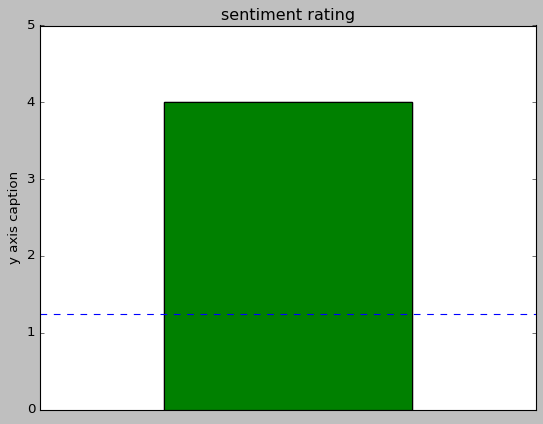

In [3]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

plt.style.use('classic')
x = np.arange(1,6) 
y = 0 * x + 5 
y_avg = 0 * x + 1.25 
y2 = 0 * x + 4 
plt.title("sentiment rating") 
#plt.xlabel("x axis caption") 
plt.ylabel("y axis caption") 
plt.xticks([])
plt.plot(x,y)
plt.plot(x,y_avg, ls = '--', color = 'b')  
plt.bar(3, y2, width = 2,  color = 'g', align = 'center')
plt.show()